# EVALUATION METRICS OF CLASSIFIERS:
   - CONFUSION MATRIX
        - ACCURACY = TP+TN/TOTAL
        - SENSITIVITY/RECALL = TP/ACTUAL TRUE VALUES
        - SPECITIVITY = TN/ACTUAL NEGATIVES
        - PRECISION = TP/TP+FP


    - ACCURACY PARADOX
    - AGAR IMBALANCED DATASET TOH ACCURACY BOHOT HIGH HO JAAYEGA !!
        - F1 SCORE: 2*(PRECISION*RECALL)/PRECISION+RECALL
        - ROC CURVE: TRUE POSITIVE VS FALSE POSITIVE
        - AUC CURVE: AREA UNDER THE CURVE GIVES THE SUMMARY OF THE ROC CURVE & PROVIDES US INFO ABOUT THE CLASSIFIER BEING ABLE TO DISTINGUISH BETWEEN CLASSES...
        - CAP CURVE: AREA UNDER THE CURVE GIVES US THE ACCURACY  OF THE MODEL

        FOR ALL THESE CURVES JITNA CURVE TOP LEFT HAND SIDE UTNA BETTER MODEL!!!


In [3]:
# IMPORTING THE REQUIRED LIBRARIES 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# LOADING THE DATASET 

dataset = pd.read_csv("DigitalAd_dataset.csv") 

print(dataset.shape)
print(dataset.head(5))

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


In [4]:
#  WE WILL BE RUNNING A SIMPLE LOGISTIC REGRESSION MODEL AND EVALUATING IT IN THIS NOTEBOOK

# STEP 01 IS THE DIVISION OF THE DATASET INTO INDEPENDENT AND DEPENDENT FEATURES 

X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

# STEP 02 IS THE DIVISION OF THE DATASET INTO TRAIN AND TEST 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# STEP 03 IS TRAINING THE MODEL USING THE TRAINING DATASET

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)
model.fit(X_train, Y_train)

# STEP 04 IS TO GET THE PREDICTIONS FOR X_TEST USING THIS TRAINED MODEL

Y_pred = model.predict(X_test)

1.CONFUSION MATRIX !!!
[[54  1]
 [13 12]]
2. ACCURACY !!! 82.5%


3. ROC CURVE !!!
 i.e RECEIVER OPERATING CURVE!!!

RANDOM MODEL !!! ROC AUC=50.000
LOGISTIC REGRESSOR MODEL !!! ROC AUC=96.073


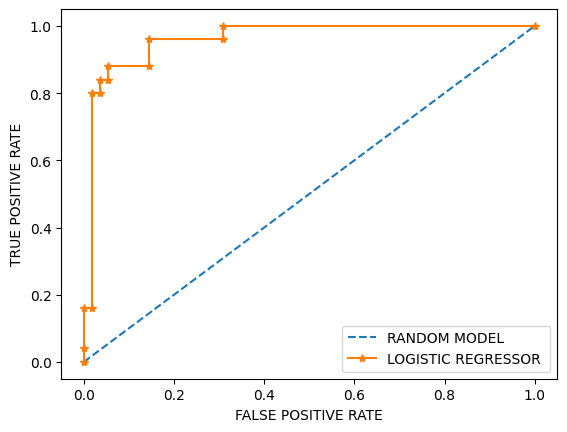

In [7]:
# NOW STEP 05 IS THE FINAL STEP TO WORK ON THE EVALUATION METRICS TO UNDERSTAND HOW GOOD THE CLASSIFIER IS !!!

# CONFUSION MATRIX 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print("1.CONFUSION MATRIX !!!")
print(cm)

# ACCURACY SCORE

from sklearn.metrics import accuracy_score
print("2. ACCURACY !!! {0}%".format(accuracy_score(Y_test, Y_pred)*100))


# ROC CURVE 

print('\n')
print('3. ROC CURVE !!!')
print(' i.e RECEIVER OPERATING CURVE!!!\n')

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(Y_test))]
lsProbability = model.predict_proba(X_test)

# PROBABILITIES FOR POSITIVE OUTCOMES ONLY 
lsProbability = lsProbability[:, 1]

# AUC SCORE
nsAUC = roc_auc_score(Y_test, nsProbability)
lrAUC = roc_auc_score(Y_test, lsProbability)

print('RANDOM MODEL !!! ROC AUC=%.3f' % (nsAUC*100))
print('LOGISTIC REGRESSOR MODEL !!! ROC AUC=%.3f' % (lrAUC*100))

# CURVES 
nsFP, nsTP, _ = roc_curve(Y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(Y_test, lsProbability)


plt.plot(nsFP, nsTP, linestyle='--', label='RANDOM MODEL ')
plt.plot(lrFP, lrTP, marker='*', label='LOGISTIC REGRESSOR ')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


In [10]:
# CROSS VALIDATION SCORES

print('5. CROSS VALDATION SCORES !!!')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)

result = cross_val_score(model, X, Y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

5. CROSS VALDATION SCORES !!!
CROSS VALIDATION SCORE: 64.25%


In [13]:
# STRATIFIED CROSS VALIDATION
    # IT MAINTAINS THE CLASS DISTRIBUTION OF THE ORIGINAL DATASET IN THE FOLDS

print('6. STRATIFIED CROSS VALIDATION SCORE !!!')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=10)

results_skfold = cross_val_score(model, X, Y, cv=skfold)
print("STRATIFIELD K-FOLD SCORE: %.2f%%" % (results_skfold.mean()*100.0))

6. STRATIFIED CROSS VALIDATION SCORE !!!
STRATIFIELD K-FOLD SCORE: 64.25%


 7. CAP CURVE !!!
i.e CUMULATIVE ACCURACY PROFILE
LEN Y_TEST:
80
CLASS 1 COUNT:
25


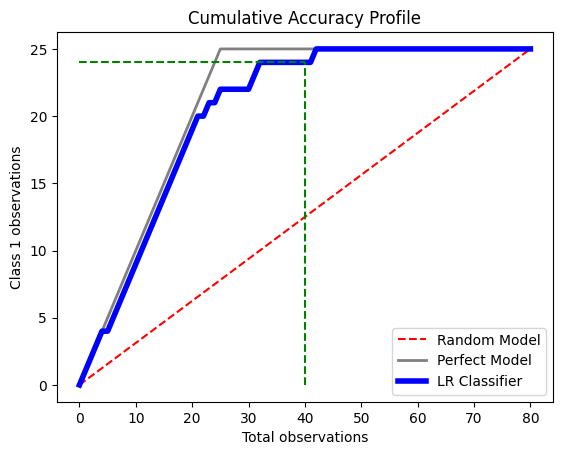

In [16]:
# CAP CURVE 

print(' 7. CAP CURVE !!!')
print('i.e CUMULATIVE ACCURACY PROFILE')

total = len(Y_test)
print('LEN Y_TEST:')
print(total)

class_1_count = np.sum(Y_test)
print('CLASS 1 COUNT:')
print(class_1_count)

class_0_count = total - class_1_count

plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')

probs = model.predict_proba(X_test)
probs = probs[:, 1]

model_y = [y for _, y in sorted(zip(probs, Y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values, y_values, c = 'b', label = 'LR Classifier', linewidth = 4)

index = int((50*total / 100))


plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')